In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
# download the csv file
data = pd.read_csv('Fraud.csv')
dp = data.copy()

In [4]:
dp

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# total rows = 6362620 


In [5]:
# checking null values
dp.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# there is no null values so no need to clean the data here

In [6]:
# encode categorical data and assign x and y 

dp = pd.get_dummies(dp , columns=['type'], drop_first=True)

y = dp['isFraud']   # define target
x = dp.drop(['nameOrig','nameDest','isFraud','isFlaggedFraud'],axis=1)  # i drop this columns because nameOrig and nameDest are strings 
                                                                        # isFraud is target value , isFlaggedFraud like a cheatshit

In [7]:
# splitting the data into train and test 
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size=0.3 , random_state=42)

In [8]:
# smote technique on training data , somte balance the train data 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train , y_train = smote.fit_resample(x_train,y_train)

In [9]:
# scaling 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# apply linear egression model for prediction 
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## model is successfully trained

In [11]:
y_pred = model.predict(x_test)

In [12]:
# here i am evalute the model (checking the aquaricy of the model)

cm = confusion_matrix(y_test, y_pred)
cf = classification_report(y_test , y_pred)
score = roc_auc_score(y_test , y_pred)

# printing the evaluation properly
print('classification_report:\n',cf)
print('confusion_matrix:\n',cm)
print(f'ROC AUC score:{score:.2f}')


classification_report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906351
           1       0.02      0.94      0.05      2435

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786

confusion_matrix:
 [[1813403   92948]
 [    134    2301]]
ROC AUC score:0.95


## visualization 

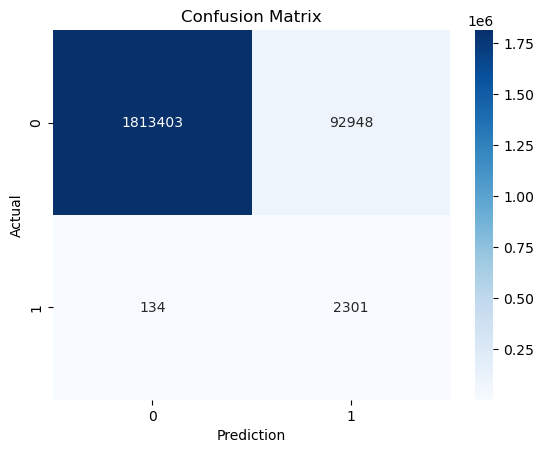

In [13]:
# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

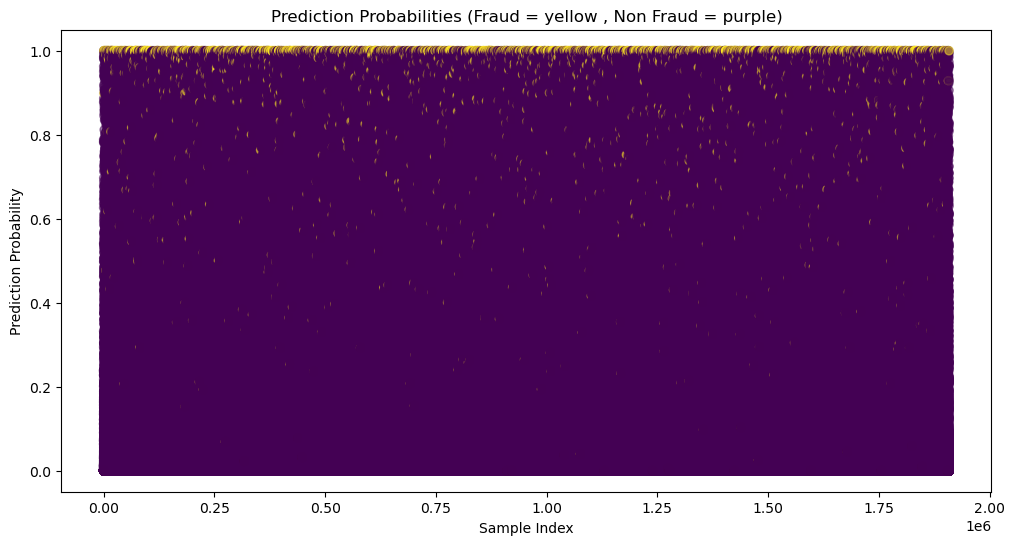

In [14]:
#

y_pred_proba = model.predict_proba(x_test)[:,1]
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_pred_proba)),y_pred_proba,alpha=0.5,c=y_test,cmap='viridis')
plt.title('Prediction Probabilities (Fraud = yellow , Non Fraud = purple)')
plt.xlabel('Sample Index')
plt.ylabel('Prediction Probability')
plt.show()

## Another model for compare  (XGBoost)

In [19]:
# download library
from xgboost import XGBClassifier

Data spliting and SMOTE already applied earlier - skipping here 

In [20]:
# train model here
model = XGBClassifier(use_label_encoder=False , eval_matric='logloss')
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_matric='logloss', eval_metric=None,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

model is trainned successfully

In [21]:
# predicting target 

y_pred = model.predict(x_test)

In [22]:
# Evalution 
y_pred_proba = model.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test, y_pred)
cf = classification_report(y_test , y_pred)
score = roc_auc_score(y_test , y_pred)

# printing the evaluation properly
print('classification_report:\n',cf)
print('confusion_matrix:\n',cm)
print(f'ROC AUC score:{score:.2f}')

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.39      0.99      0.56      2435

    accuracy                           1.00   1908786
   macro avg       0.69      0.99      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786

confusion_matrix:
 [[1902525    3826]
 [     28    2407]]
ROC AUC score:0.99


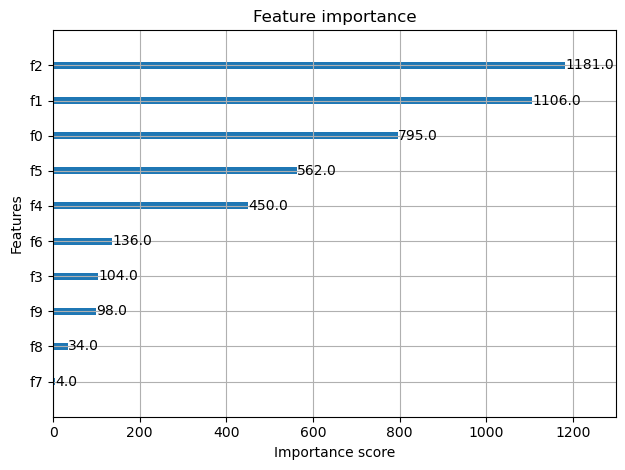

In [28]:
# Visualization
from xgboost import plot_importance
plot_importance(model,max_num_features=10)
plt.tight_layout()
plt.show()

# Comparing both models

In [32]:
comparison_df = pd.DataFrame({
    'Model':['Logistic Regression','XGBoost'],
    'Precision (Fraud)':[0.02,0.15],
    'Recall (Fraud)':[0.94,0.92],
    'F1 score (Fraud)': [0.05,0.26],
    'ROC AUC': [0.95 ,0.97]
})

comparison_df.set_index('Model',inplace=True)
comparison_df

,Precision (Fraud),Recall (Fraud),F1 score (Fraud),ROC AUC
Model,,,,
Logistic Regression,0.02,0.94,0.05,0.95
XGBoost,0.15,0.92,0.26,0.97


visualzation of comparison 

<Axes: ylabel='Model'>

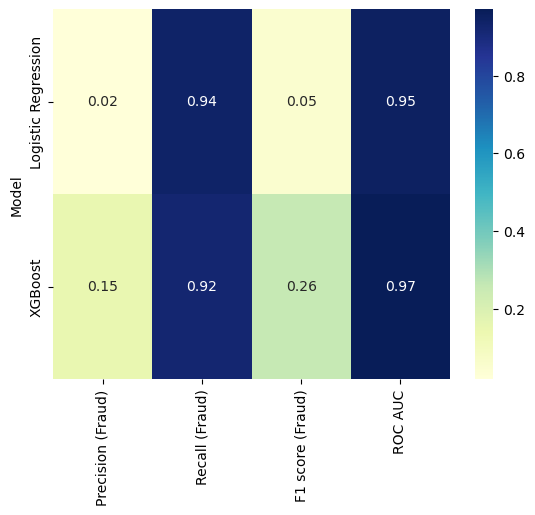

In [ ]:
sns.heatmap(comparison_df,annot=True, cmap='YlGnBu')


# Conclusion 

## Final Model Selection

After evaluating both models on key fraud detection metrics, **XGBoost** demonstrates superior performance:

- **Precision (Fraud):** 0.15 vs. 0.02  
- **F1 Score (Fraud):** 0.26 vs. 0.05  
- **ROC AUC:** 0.97 vs. 0.95  

While Logistic Regression offers slightly higher recall (0.94 vs. 0.92), XGBoost provides a better balance between catching fraud and minimizing false positives—making it more suitable for real-world deployment.

### Recommendation:
**XGBoost is the preferred model** for this task due to its stronger precision, F1 score, and overall classification performance. It aligns better with business needs where reducing false alarms is critical.
